In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils import load_img, img_to_array

import warnings

warnings.filterwarnings('ignore')

In [23]:
base_dir = 'images'
test_dir = 'test_images'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                             image_size=(64, 64),
                                             subset='training',
                                             seed=1,
                                             validation_split=0.1,
                                             batch_size=64)
test_datagen = image_dataset_from_directory(test_dir,
                                            image_size=(64, 64),
                                            subset='validation',
                                            seed=1,
                                            validation_split=0.1,
                                            batch_size=64)

Found 47009 files belonging to 2 classes.
Using 42309 files for training.
Found 11649 files belonging to 2 classes.
Using 1164 files for validation.


In [24]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 64)        

In [26]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/10
662/662 [==============================] - 109s 159ms/step - loss: 0.2945 - accuracy: 0.8794 - val_loss: 0.1683 - val_accuracy: 0.9287
Epoch 2/10
662/662 [==============================] - 106s 161ms/step - loss: 0.1746 - accuracy: 0.9357 - val_loss: 0.2092 - val_accuracy: 0.9055
Epoch 3/10
662/662 [==============================] - 106s 160ms/step - loss: 0.1512 - accuracy: 0.9445 - val_loss: 0.1588 - val_accuracy: 0.9373
Epoch 4/10
662/662 [==============================] - 81s 122ms/step - loss: 0.1468 - accuracy: 0.9460 - val_loss: 0.3666 - val_accuracy: 0.8840
Epoch 5/10
662/662 [==============================] - 72s 109ms/step - loss: 0.1351 - accuracy: 0.9510 - val_loss: 0.2190 - val_accuracy: 0.9399
Epoch 6/10
662/662 [==============================] - 71s 107ms/step - loss: 0.1250 - accuracy: 0.9550 - val_loss: 0.1923 - val_accuracy: 0.9227
Epoch 7/10
662/662 [==============================] - 71s 108ms/step - loss: 0.1225 - accuracy: 0.9555 - val_loss: 0.3007 - val

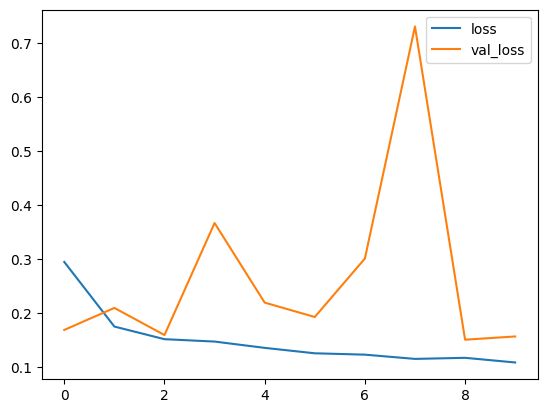

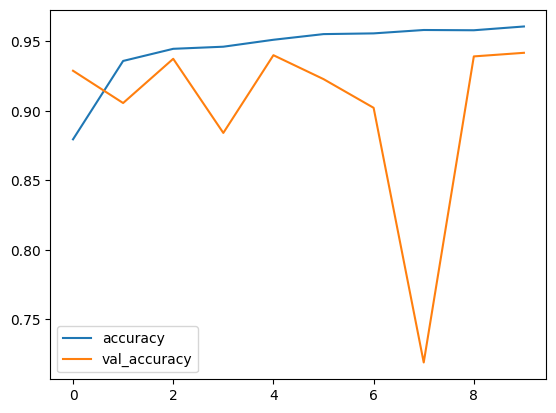

In [27]:
history = model.fit(train_datagen,
                    epochs=10,
                    validation_data=test_datagen)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 36ms/step
male


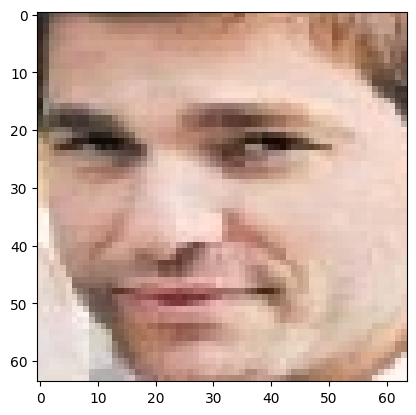

In [35]:
# CLASSIFICATION
test_image = load_img('images/male/090586.jpg.jpg', target_size=(64, 64))

# For show image
plt.imshow(test_image)
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# print(result)
print('female') if result[0][0] < 0.5 else print('male')

In [29]:
results = model.evaluate(test_datagen,
                         batch_size=32)

19/19 [==============================] - 1s 41ms/step - loss: 0.1562 - accuracy: 0.9416


In [30]:
test_2_datagen = image_dataset_from_directory(test_dir,
                                              image_size=(64, 64),
                                              seed=1,
                                              batch_size=64)
test_2_result = model.evaluate(test_2_datagen)

Found 11649 files belonging to 2 classes.
183/183 [==============================] - 8s 45ms/step - loss: 0.1212 - accuracy: 0.9561
